In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"E:\mac_obj_file\creditCardFraud\creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 根据逻辑回归的特点，通过数据目标值可以发现，0代表没有欺诈记录的用户，1代表有被欺诈的用户，（1为正例）。

Text(0, 0.5, 'Frequency')

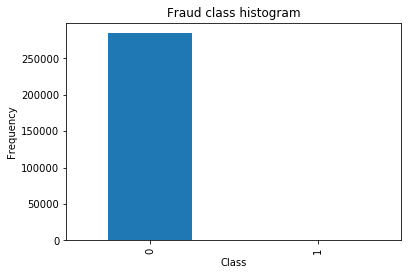

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### 查看一下样本分布

In [5]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
data.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


#### 标准化处理数据

In [6]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

#### 构建特征值和目标值

In [7]:
# 看看有多少异常数据
number_records_fraud = len(data[data.Class == 1])
# 拿到异常数据的 index
fraud_indices = np.array(data[data.Class == 1].index)
# 拿到正常数据的 index
normal_indices = data[data.Class == 0].index
# 随机选出数据
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)
# 拼接数据index
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
# 拿出数据
under_sample_data = data.iloc[under_sample_indices,:]
#下采样特征值目标值
X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class']
# 看看结果
print("正常样本有多少: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("异常样本有多少: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("一共多少数据: ", len(under_sample_data))

正常样本有多少:  0.5
异常样本有多少:  0.5
一共多少数据:  984


#### 下采样处理数据

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
print("原始数据训练集特征数量: ", len(X_train))
print("原始数据测试集特征数量: ", len(X_test))
print("原始数据特征总数量: ", len(X_train)+len(X_test))


原始数据训练集特征数量:  199364
原始数据测试集特征数量:  85443
原始数据特征总数量:  284807


#### 原始数据切分

In [9]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("下采样训练集特征数量: ", len(X_train_undersample))
print("下采样测试集特征数量: ", len(X_test_undersample))
print("下采样特征总数量: ", len(X_train_undersample)+len(X_test_undersample))


下采样训练集特征数量:  688
下采样测试集特征数量:  296
下采样特征总数量:  984


#### 下采样数据切分

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report 

####  导入要使用的模型库

In [11]:
def printing_Kfold_scores(x_train_data,y_train_data):
    """交叉验证找到最好的正则化力度的函数"""
    fold = KFold(5,shuffle=False) 
    # 正则化力度
    c_param_range = [0.01,0.1,1,10,100]
    #用于格式化输出
    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C 正则化力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        
        # fold.split(y_train_data) 会返回两个list: train_indices = indices[0], test_indices = indices[1]
        for iteration, indices in enumerate(fold.split(y_train_data),start=1):

            # 建立逻辑回归模型
            lr = LogisticRegression(C = c_param, penalty = 'l1',solver='liblinear')
            # fit （.values.ravel() 是将带索引的数据转换为不带索引数据）
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())
            # 预测的目标值
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # 召回率
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('迭代次数：', iteration,': 召回率：', recall_acc)

        # 平均召回率.
        results_table.loc[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].astype("float").values.argmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('最佳的模型参数为：', best_c)
    print('*********************************************************************************')
    
    return best_c

#### 定义交叉验证找到最好的正则化力度的函数

In [12]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

-------------------------------------------
C 正则化力度:  0.01
-------------------------------------------

迭代次数： 1 : 召回率： 0.9315068493150684
迭代次数： 2 : 召回率： 0.9178082191780822
迭代次数： 3 : 召回率： 1.0
迭代次数： 4 : 召回率： 0.9864864864864865
迭代次数： 5 : 召回率： 0.9545454545454546

平均召回率  0.9580694019050183

-------------------------------------------
C 正则化力度:  0.1
-------------------------------------------

迭代次数： 1 : 召回率： 0.8356164383561644
迭代次数： 2 : 召回率： 0.863013698630137
迭代次数： 3 : 召回率： 0.9322033898305084
迭代次数： 4 : 召回率： 0.9324324324324325
迭代次数： 5 : 召回率： 0.9090909090909091

平均召回率  0.8944713736680303

-------------------------------------------
C 正则化力度:  1
-------------------------------------------

迭代次数： 1 : 召回率： 0.8493150684931506
迭代次数： 2 : 召回率： 0.8767123287671232
迭代次数： 3 : 召回率： 0.9491525423728814
迭代次数： 4 : 召回率： 0.9324324324324325
迭代次数： 5 : 召回率： 0.9090909090909091

平均召回率  0.9033406562312993

-------------------------------------------
C 正则化力度:  10
-------------------------------------------

迭代次数： 1 : 召回

#### 下采样交叉验证与网格搜索，选出最好的模型参数

In [13]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    混淆矩阵绘图函数
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### 定义混淆矩阵绘图函数

使用降采样模型预测出的召回率为:  0.9251700680272109


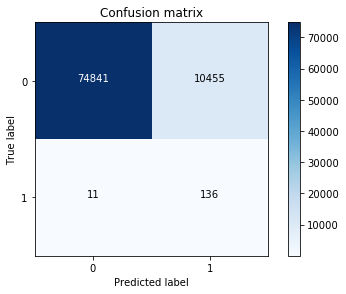

In [15]:
import itertools
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("使用降采样模型预测出的召回率为: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘图
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### 通过下样模型预测原数据的对应的混淆矩阵可以发现：虽然召回率还可以，但是预测误杀了3000多正例是有问题的。

In [16]:
best_c = printing_Kfold_scores(X_train,y_train)

-------------------------------------------
C 正则化力度:  0.01
-------------------------------------------

迭代次数： 1 : 召回率： 0.4925373134328358
迭代次数： 2 : 召回率： 0.6027397260273972
迭代次数： 3 : 召回率： 0.6833333333333333
迭代次数： 4 : 召回率： 0.5692307692307692
迭代次数： 5 : 召回率： 0.45

平均召回率  0.5595682284048672

-------------------------------------------
C 正则化力度:  0.1
-------------------------------------------

迭代次数： 1 : 召回率： 0.5671641791044776
迭代次数： 2 : 召回率： 0.6164383561643836
迭代次数： 3 : 召回率： 0.6833333333333333
迭代次数： 4 : 召回率： 0.5846153846153846
迭代次数： 5 : 召回率： 0.525

平均召回率  0.5953102506435158

-------------------------------------------
C 正则化力度:  1
-------------------------------------------

迭代次数： 1 : 召回率： 0.5522388059701493
迭代次数： 2 : 召回率： 0.6164383561643836
迭代次数： 3 : 召回率： 0.7166666666666667
迭代次数： 4 : 召回率： 0.6153846153846154
迭代次数： 5 : 召回率： 0.5625

平均召回率  0.612645688837163

-------------------------------------------
C 正则化力度:  10
-------------------------------------------

迭代次数： 1 : 召回率： 0.5522388059701493
迭代

#### 什么都不做，用原始的数据集建立模型找到最合适的模型参数

使用降采样模型预测出的召回率为:  0.6190476190476191


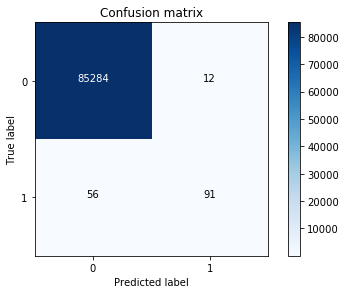

In [17]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample = lr.predict(X_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(y_test,y_pred_undersample)
np.set_printoptions(precision=2)

print("使用降采样模型预测出的召回率为: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# 绘图
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### 通过原始数据建立的模型预测，发现召回率不忍直视。

不同的阈值(0.1)对应的降采样数据的召回率为:  1.0
不同的阈值(0.2)对应的降采样数据的召回率为:  1.0
不同的阈值(0.3)对应的降采样数据的召回率为:  1.0
不同的阈值(0.4)对应的降采样数据的召回率为:  0.9795918367346939
不同的阈值(0.5)对应的降采样数据的召回率为:  0.9387755102040817
不同的阈值(0.6)对应的降采样数据的召回率为:  0.891156462585034
不同的阈值(0.7)对应的降采样数据的召回率为:  0.8367346938775511
不同的阈值(0.8)对应的降采样数据的召回率为:  0.7482993197278912
不同的阈值(0.9)对应的降采样数据的召回率为:  0.5918367346938775


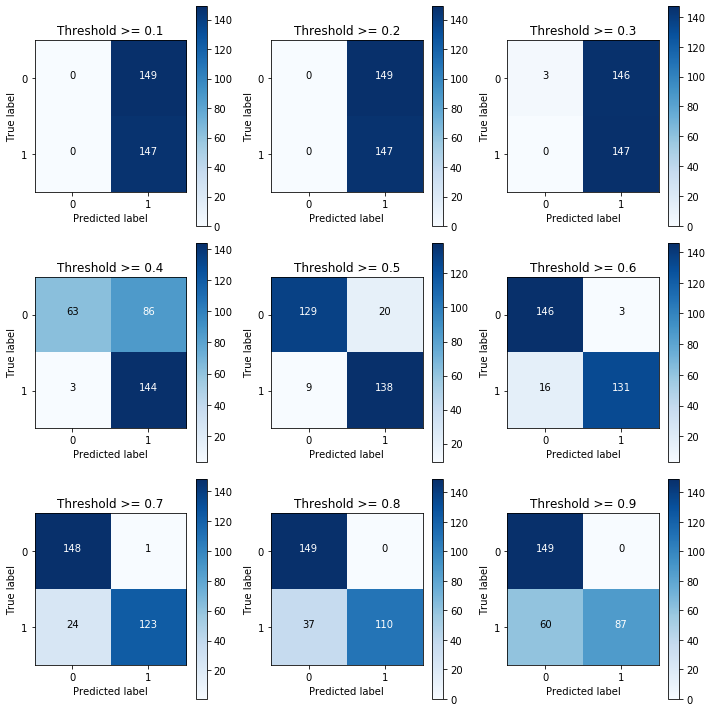

In [18]:
lr = LogisticRegression(C = 0.01, penalty = 'l1',solver='liblinear')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # 计算混淆矩阵
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print(f"不同的阈值({i})对应的降采样数据的召回率为: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # 绘图
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [19]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#### 导入需要实施过采样的相关库

In [20]:
credit_cards=pd.read_csv(r"E:\mac_obj_file\creditCardFraud\creditcard.csv")
columns=credit_cards.columns
features_columns=columns.delete(len(columns)-1)
features=credit_cards[features_columns]
labels=credit_cards['Class']
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

#### 读取数据，并分割好数据

In [21]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)
print(len(os_labels[os_labels==1]))

227454


#### 看看生成的数据对不对

In [22]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features,os_labels)

-------------------------------------------
C 正则化力度:  0.01
-------------------------------------------

迭代次数： 1 : 召回率： 0.8903225806451613
迭代次数： 2 : 召回率： 0.8947368421052632
迭代次数： 3 : 召回率： 0.9679318357862122
迭代次数： 4 : 召回率： 0.9578373506556314
迭代次数： 5 : 召回率： 0.958408898561238

平均召回率  0.9338475015507012

-------------------------------------------
C 正则化力度:  0.1
-------------------------------------------

迭代次数： 1 : 召回率： 0.8903225806451613
迭代次数： 2 : 召回率： 0.8947368421052632
迭代次数： 3 : 召回率： 0.9700785658957619
迭代次数： 4 : 召回率： 0.9600356118310417
迭代次数： 5 : 召回率： 0.9600356118310417

平均召回率  0.9350418424616539

-------------------------------------------
C 正则化力度:  1
-------------------------------------------

迭代次数： 1 : 召回率： 0.8903225806451613
迭代次数： 2 : 召回率： 0.8947368421052632
迭代次数： 3 : 召回率： 0.970366271992918
迭代次数： 4 : 召回率： 0.960310394477968
迭代次数： 5 : 召回率： 0.9592002725843858

平均召回率  0.9349872723611392

-------------------------------------------
C 正则化力度:  10
-------------------------------------------


#### 找到过采样模型的最好的模型参数

使用过采样模型预测出的召回率为:  0.9108910891089109


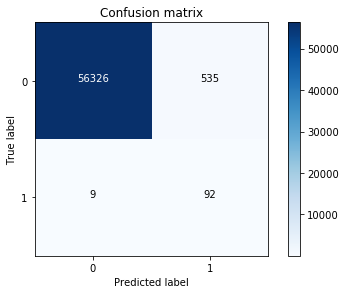

In [24]:
lr = LogisticRegression(C = best_c, penalty = 'l1',solver='liblinear')
lr.fit(os_features,os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# 混淆矩阵计算
cnf_matrix = confusion_matrix(labels_test,y_pred)
np.set_printoptions(precision=2)

print("使用过采样模型预测出的召回率为: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### 通过过采样后的数据建立的模型预测，发现误杀率变得很低了，
#### 所以如果使用模型的话，那么就使用过采样建立的模型即可。